In [1]:
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
from pathlib import Path
import jax
import jax.numpy as jnp
import math

In [2]:
logs_base_path = "../../logs/"

experiment_names = ["mnist-32", "mnist-128"]

min_dots = math.inf 
max_dots = -math.inf 

for experiment_name in experiment_names:
  checkpoint_dir = Path(logs_base_path, "results", f"{experiment_name}.json")

  with open(checkpoint_dir, "r") as json_file:
    df = pd.read_json(json_file)

  max_dots = max(max_dots, max(df["dots"]))
  min_dots = min(min_dots, min(df["dots"]))

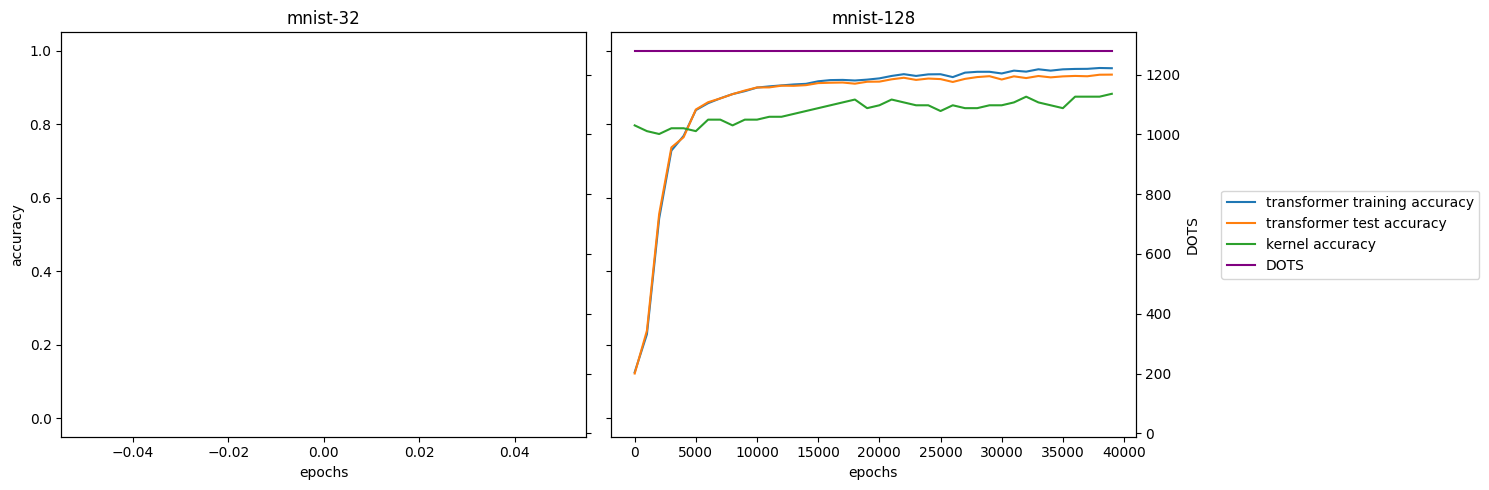

In [3]:
logs_base_path = "../../logs/"
num_experiments = len(experiment_names)

fig, axs = plt.subplots(1, num_experiments, figsize=(5 + num_experiments * 5, 5), sharey=True)

for i, experiment_name in enumerate(experiment_names):
    
    checkpoint_dir = Path(logs_base_path, "results", f"{experiment_name}.json")

    with open(checkpoint_dir, "r") as json_file:
        df = pd.read_json(json_file)

    df["step"] = df.index * 1000

    ax1 = axs[i]
    ax2 = ax1.twinx()

    sns.lineplot(data=df, x="step", y="training_acc", label="transformer training accuracy", ax=ax1)
    sns.lineplot(data=df, x="step", y="test_acc", label="transformer test accuracy", ax=ax1)
    sns.lineplot(data=df, x="step", y="svm_accuracy", label="kernel accuracy", ax=ax1)
    
    ax1.set_xlabel("epochs")
    ax1.set_ylabel("accuracy")
    ax1.set_ylim([-0.05, 1.05])
    ax1.legend().set_visible(False)

    sns.lineplot(data=df, x="step", y="dots", label="DOTS", color="purple", ax=ax2)
    
    if i == len(experiment_names) - 1:
      ax2.set_ylabel("DOTS")
    else: 
      ax2.set_ylabel("")

    visual_buffer = (max_dots - min_dots) * 0.05
    ax2.set_ylim([min_dots - visual_buffer, max_dots + visual_buffer])

    lines, labels = ax1.get_legend_handles_labels() 
    lines2, labels2 = ax2.get_legend_handles_labels() 

    if i == len(experiment_names) - 1:
      ax2.legend(lines + lines2, labels + labels2, loc='center left', bbox_to_anchor=(1.15, 0.5))
    else: 
      ax2.legend().set_visible(False)
      ax2.tick_params(axis='y', which='both', labelright=False)

    ax1.set_title(experiment_name)

fig.tight_layout()

In [7]:
s5_checkpoint_dir = Path(logs_base_path, "results", "s5.json")

with open(checkpoint_dir, "r") as json_file:
  df = pd.read_json(json_file)

print(jnp.array(df["kernel"][0]))

FileNotFoundError: [Errno 2] No such file or directory: '../../logs/results/div-alternate-trained.json'

In [11]:
kernel = jnp.array(df["kernel"][0])
x = jnp.linalg.matrix_rank(kernel)
int(jax.device_get(x))

512